Philippe Joly 2025-07-03

# Original GPU and Streaming GPU Re-PFB Pipeline Output Comparison

This notebook serves as the final test for the Streaming GPU and Original GPU Re-PFB pipeline comparing them with each other and with Mohan's original script.

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from os import path
sys.path.append(path.expanduser('~'))

In [45]:
fns = [
    "/project/s/sievers/philj0ly/xcorr_cpu/xcorr_all_ant_4bit_1721361671_14336_64_1788_47_48_og.npz",
    "/project/s/sievers/philj0ly/xcorr_gpu/xcorr_all_ant_4bit_1721361671_14336_64_1788_47_48_wcut.npz",
    "/project/s/sievers/philj0ly/xcorr_gpu/xcorr_all_ant_4bit_1721361671_14336_64_255_47_48.npz"
]
data = []
mask = []
missing_fraction = []
chans = []

for fn in fns:
    with np.load(fn) as f:
        data.append(f['data'])
        mask.append(f['mask'])
        missing_fraction.append(f["missing_fraction"])
        chans.append(f['chans'])


In [46]:
with np.load("/project/s/sievers/mohanagr/xcorr_axion/xcorr_all_ant_4bit_1721361571_14336_64_15326_0_120.npz") as f:
    # Size Adjusted to match the test xcorr results
    channel_init = 6
    data_og = f['data'][:,:,channel_init*64:(channel_init+1)*64,:468]
    mask_og = f['mask'][:,:,channel_init*64:(channel_init+1)*64,:468]
    missing_fraction_og = f['missing_fraction'][:,:468]
    chans_og = f['chans'][channel_init*64:(channel_init+1)*64]

In [47]:
df_record = 125e6/2048 # (Hz) frequency range / # of channels
df = df_record/64
N = 14336
times = N/df_record*np.arange(468)

##  Data Visualisation

In [48]:
spectra = []
freqs = []

for i in range(len(data)):
    spectra.append(np.ma.MaskedArray(data=data[i], mask=mask[i]))
    freqs.append(chans[i]*df) # (Hz)

spectra_og = np.ma.MaskedArray(data=data_og, mask=mask_og)
freqs_og = chans_og*df 

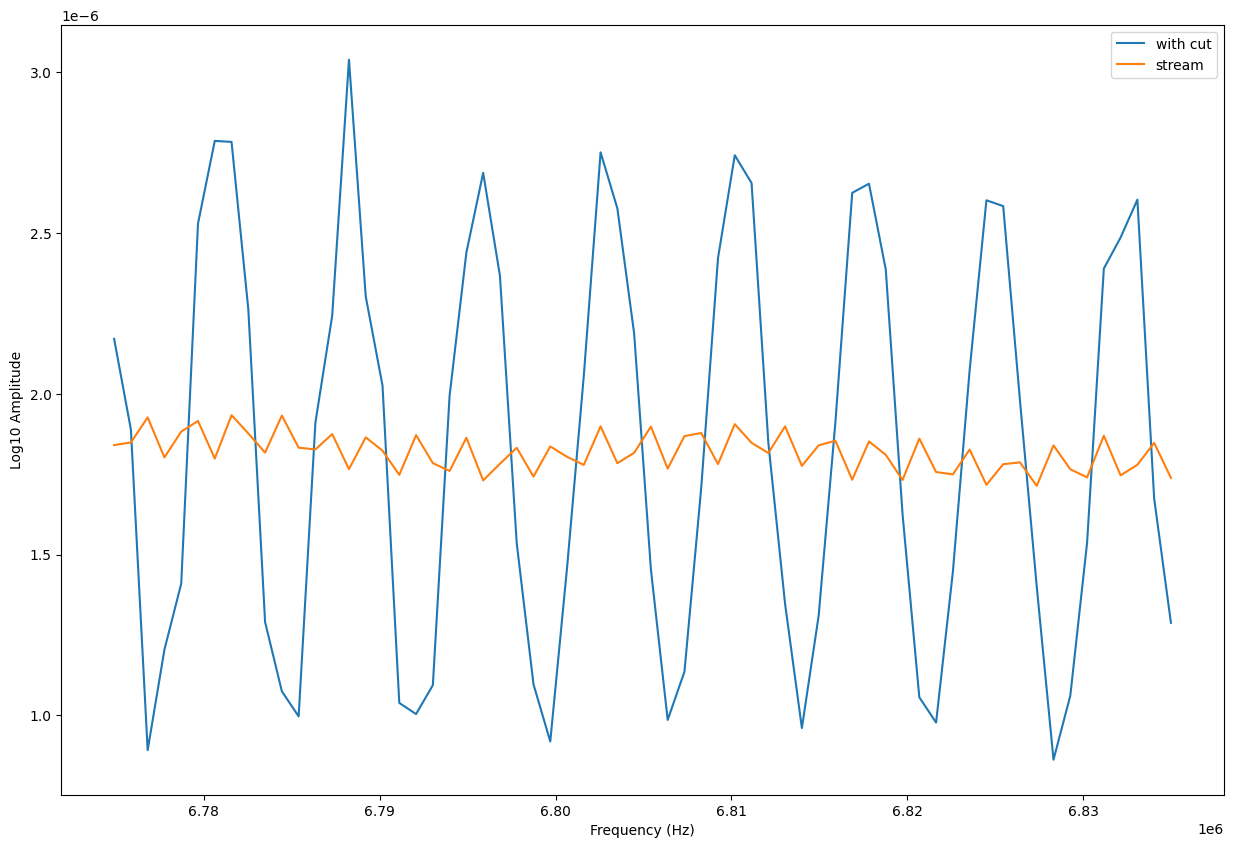

In [50]:
t = 10
pu = ['gpu og', 'with cut', 'stream']

plt.figure(figsize=(15,10))
for i in range(1,len(fns)):    
    # plt.plot(freqs[i], np.log10(np.abs(spectra[i][0,0,:,t])), label=pu[i])
    plt.plot(freqs[i], np.abs(spectra[i][0,0,:,t]), label=pu[i])


# plt.plot(freqs_og, np.log10(np.abs(spectra_og[0,0,:,t])), label="Original")

# plt.ylim(0,5)

plt.xlabel('Frequency (Hz)')   
plt.ylabel('Log10 Amplitude')
plt.legend()

plt.show()

In [40]:
np.mean(np.abs(spectra[2]))

np.float64(2.7537421546507913e-06)

This plot illustrates data amplitude across frequencies at particular times comparing the Orginal data from Mohan and my cpu as well as gpu implementation of xcorr re_pfb pipelines.

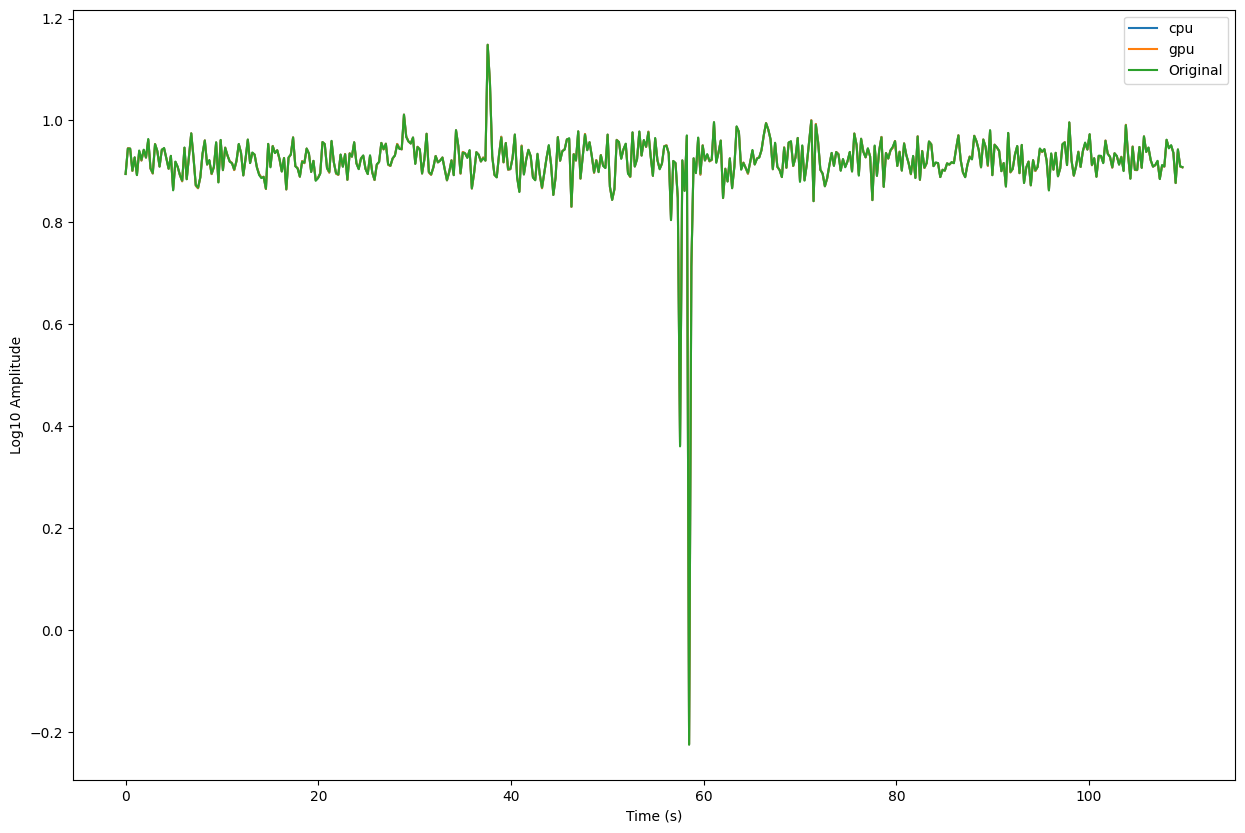

In [19]:
f = 10

plt.figure(figsize=(15,10))
for i in range(2):    
    plt.plot(times, np.log10(np.abs(spectra[i,0,0,f,:])), label=pu[i])

plt.plot(times, np.log10(np.abs(spectra_og[0,0,f,:])), label="Original")

plt.xlabel('Time (s)')   
plt.ylabel('Log10 Amplitude')
plt.legend()

plt.show()

This plot illustrates the data's amplitude at given frequencies across time comparing the Orginal data from Mohan and my cpu as well as gpu implementation of xcorr re_pfb pipelines.

Note that, as expected the GPU and CPU implementation match exactly the results from Mohan.